In [1]:
import numpy as np
from modeci_mdf.mdf import *
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.utils import simple_connect

In [2]:
# Create the model and graph
model = Model(id="example_model")
graph = Graph(id="example_graph")
model.graphs.append(graph)

In [3]:
# Node 1: Input node with a parameter "input_val"
node1 = Node(id="node1")
node1.parameters.append(Parameter(id="input_val", value=2.0))
node1.output_ports.append(OutputPort(id="output", value="input_val"))
graph.nodes.append(node1)

In [4]:
# Node 2: Takes input from node1, multiplies it by 3 and adds 2 if the input is greater than 1, otherwise subtracts 1
node2 = Node(id="node2")
node2.input_ports.append(InputPort(id="input"))
node2.parameters.append(Parameter(id="multiplier", value=3.0))
node2.parameters.append(Parameter(id="offset", value=2.0))
node2.parameters.append(Parameter(id="result", value="input * multiplier + offset"))
node2.output_ports.append(OutputPort(id="output", value="result"))
graph.nodes.append(node2)

In [5]:
# Node 3: Takes input from node2 and computes its square root
import math
node3 = Node(id="node3")
node3.input_ports.append(InputPort(id="input"))
node3.parameters.append(Parameter(id="result", value="input * 10"))
node3.output_ports.append(OutputPort(id="output", value="result"))
graph.nodes.append(node3)

In [6]:
#  Connect the nodes
e1 = simple_connect(node1, node2, graph)
e2 = simple_connect(node2, node3, graph)

In [7]:
model.to_json_file("example.json")
model.to_yaml_file("example.yaml")

'example.yaml'

Converting MDF graph: example_graph to graphviz (level: 3, format: png)
    Node: node1
    Node: node2
    Node: node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node2_node3 connects node2 to node3
Written graph image to: example.png


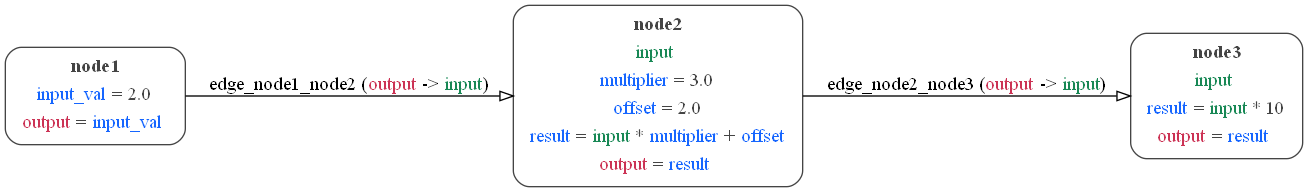

In [8]:
model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="example",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="example.png")

In [9]:
#  Evaluate the graph
eg = EvaluableGraph(graph, verbose=False)
eg.evaluate()

# Print the output values
print('Output of node1:', eg.enodes["node1"].evaluable_outputs["output"].curr_value)
print('Output of node2:', eg.enodes["node2"].evaluable_outputs["output"].curr_value)


Init graph: example_graph
Evaluating graph: example_graph, root nodes: ['node1'], with array format numpy
Output of node1: 2
Output of node2: 8


In [11]:
import numpy as np 

# give some another input to the node1 
node1.get_parameter('input_val').value = 0

eg.evaluate()

# Print the output values
print('Output of node1:', eg.enodes["node1"].evaluable_outputs["output"].curr_value)
print('Output of node2:', eg.enodes["node2"].evaluable_outputs["output"].curr_value)

print('Output of node3:', eg.enodes["node3"].evaluable_outputs["output"].curr_value)

Evaluating graph: example_graph, root nodes: ['node1'], with array format numpy
Output of node1: 0
Output of node2: 2
Output of node3: 20
